# A Playground for Pointer-Generator Networks with Coverge 👨‍🔬

An interactive demo for **"Get To The Point: Summarization with Pointer-Generator Networks"**, [available here](https://www.aclweb.org/anthology/P17-1099/) by Abigail See, Peter J Liu, and Christopher Manning.

This notebook is made in the context of the [Natural Language Processing](https://moodle.polytechnique.fr/course/view.php?id=10247) course with [Telecom Paris](https://www.telecom-paris.fr/), in IP Paris's Master for Data Science ⚔️

It is linked to [this github repository](https://github.com/alexZajac/pointer-generator) for easier file handling.

In [1]:
%tensorflow_version 1.x
!rm -rf sample_data

TensorFlow 1.x selected.


# Setup the packages needed for the network 📦

## 1. Download Stanford CoreNLP

In [2]:
!wget https://nlp.stanford.edu/software/stanford-corenlp-latest.zip -nc
!unzip stanford-corenlp-latest.zip
!rm -f stanford-corenlp-latest.zip

--2021-03-25 09:53:16--  https://nlp.stanford.edu/software/stanford-corenlp-latest.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 504669331 (481M) [application/zip]
Saving to: ‘stanford-corenlp-latest.zip’

stanford-corenlp-la 100%[===================>] 481.29M  1.25MB/s    in 12m 47s 

2021-03-25 10:06:04 (642 KB/s) - ‘stanford-corenlp-latest.zip’ saved [504669331/504669331]

Archive:  stanford-corenlp-latest.zip
   creating: stanford-corenlp-4.2.0/
  inflating: stanford-corenlp-4.2.0/jaxb-core-2.3.0.1-sources.jar  
  inflating: stanford-corenlp-4.2.0/input.txt.xml  
  inflating: stanford-corenlp-4.2.0/javax.json.jar  
  inflating: stanford-corenlp-4.2.0/jaxb-core-2.3.0.1.jar  
  inflating: stanford-corenlp-4.2.0/LICENSE.txt  
  inflating: stanford-corenlp-4.2.0/javax.activation-api-1.2.0.jar  
  inflating: stanford-corenlp-4.2.0

In [3]:
import os
# setting the environment variable for the CoreNLP package
os.environ['CLASSPATH'] = "/content/stanford-corenlp-4.2.0/stanford-corenlp-4.2.0.jar" 

In [4]:
!echo "Pointer generator networks is all you need" | java edu.stanford.nlp.process.PTBTokenizer

Pointer
generator
networks
is
all
you
need
PTBTokenizer tokenized 7 tokens at 53.21 tokens per second.


## 2. Download Pointer-Generator network and visualization package

In [5]:
!rm -rf pointer-generator
!git clone https://github.com/alexZajac/pointer-generator

Cloning into 'pointer-generator'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 180 (delta 24), reused 54 (delta 14), pack-reused 115
Receiving objects: 100% (180/180), 1.08 MiB | 14.18 MiB/s, done.
Resolving deltas: 100% (79/79), done.


## 3. Download pretrained model

In [6]:
!gdown https://drive.google.com/uc?id=0B7pQmm-OfDv7ZUhHZm9ZWEZidDg
!unzip pretrained_model_tf1.2.1.zip
!mv pretrained_model_tf1.2.1 pretrained_model
!rm -f pretrained_model_tf1.2.1.zip

Streaming output truncated to the last 5000 lines.
  inflating: pretrained_model_tf1.2.1/decode_test_400maxenc_4beam_35mindec_120maxdec_ckpt-238410/reference/004058_reference.txt  
  inflating: pretrained_model_tf1.2.1/decode_test_400maxenc_4beam_35mindec_120maxdec_ckpt-238410/reference/004108_reference.txt  
  inflating: pretrained_model_tf1.2.1/decode_test_400maxenc_4beam_35mindec_120maxdec_ckpt-238410/reference/000580_reference.txt  
  inflating: pretrained_model_tf1.2.1/decode_test_400maxenc_4beam_35mindec_120maxdec_ckpt-238410/reference/006769_reference.txt  
  inflating: pretrained_model_tf1.2.1/decode_test_400maxenc_4beam_35mindec_120maxdec_ckpt-238410/reference/006639_reference.txt  
  inflating: pretrained_model_tf1.2.1/decode_test_400maxenc_4beam_35mindec_120maxdec_ckpt-238410/reference/009844_reference.txt  
  inflating: pretrained_model_tf1.2.1/decode_test_400maxenc_4beam_35mindec_120maxdec_ckpt-238410/reference/009914_reference.txt  
  inflating: pretrained_model_tf1.2.1/d

In [7]:
!cat pretrained_model/README

This directory contains a pre-trained model similar to that described in the paper "Get To The Point: Summarization with Pointer-Generator Networks" https://arxiv.org/pdf/1704.04368.pdf.

Due to differences in the code used for the original experiment, and the publicly-released code (e.g. upgrading to Tensorflow 1.0, cleaning up the code), it is not possible to release the original model.

CONTENTS:

train/
  checkpoint
    used by Tensorflow to point to the latest checkpoint
  events.out.tfevents.*
    Tensorboard files recording summaries from training
    To see the Tensorboard record from training, run Tensorboard from the root directory (i.e pretrained_model)
  graph.pbtxt
    contains the Tensorflow graph
  model-238410.*
    the checkpoint files
  pre-coverage/
    Contains the checkpoint files for the model before the coverage training phase began. If you want to train the no-coverage model more before introducing coverage, use this model.
  projector_config.pbtxt
    For the w

## 4. Download the base vocab used for CNN / Daily Mail

In [8]:
!gdown https://drive.google.com/uc?id=0BzQ6rtO2VN95a0c3TlZCWkl3aU0
!rm -rf finished_files

Downloading...
From: https://drive.google.com/uc?id=0BzQ6rtO2VN95a0c3TlZCWkl3aU0
To: /content/finished_files.zip
1.00GB [00:16, 60.8MB/s]


In [9]:
!unzip finished_files.zip
!rm -f finished_files.zip

Archive:  finished_files.zip
   creating: finished_files/
  inflating: finished_files/test.bin  
  inflating: finished_files/train.bin  
  inflating: finished_files/val.bin  
  inflating: finished_files/vocab    
   creating: finished_files/chunked/
  inflating: finished_files/chunked/train_127.bin  
  inflating: finished_files/chunked/train_126.bin  
  inflating: finished_files/chunked/train_125.bin  
  inflating: finished_files/chunked/train_124.bin  
  inflating: finished_files/chunked/train_123.bin  
  inflating: finished_files/chunked/train_122.bin  
  inflating: finished_files/chunked/train_121.bin  
  inflating: finished_files/chunked/train_120.bin  
  inflating: finished_files/chunked/train_119.bin  
  inflating: finished_files/chunked/train_118.bin  
  inflating: finished_files/chunked/train_117.bin  
  inflating: finished_files/chunked/train_116.bin  
  inflating: finished_files/chunked/train_115.bin  
  inflating: finished_files/chunked/train_114.bin  
  inflating: finished_

# Summarize your own text ✍️

In [10]:
%%capture
!pip install pyrouge

## Choose your parameters

You can use the form to choose your own summarization parameters:
- `text_input`: This is your source text input for summarization. Too long texts might not be optimal to summarize, but come up with your own interestig examples!
- `max_words_input`: Max timesteps of the encoder (max source text tokens used)
- `min_summary_tokens`: The minimum amount of words that the summary needs to have.
- `max_summary_tokens`: The maximum amount of words that the summary can have.
- `beam_size` : The number of words (with the highest probability) considered at each step of the decoding phase as candidate for summarization


In [32]:
#@title Parameters form
text_input = "The buyer of Twitter's first ever tweet by its founder Jack Dorsey for $2.9m (\xA32.1m) sees it as a wise investment. \"It's a piece of human history in the form of a digital asset. Who knows what will be the price of the first tweet of human history 50 years from now,\" Malaysia-based Sina Estavi said. Mr Estavi compared his newly-acquired tweet to Leonardo da Vinci's Mona Lisa. Experts agree that the first tweet from the Twitter founder on his own platform is a highly valuable asset. Jack Dorsey's tweet, which said \"just setting up my twttr,\" was first published on 21 March 2006 and was auctioned off by Mr Dorsey for Give Directly's Africa Response charity. Mr Estavi, the chief executive of cryptocurrency firm Bridge Oracle, bought the tweet using ether, a rival currency to bitcoin. It was sold as a non-fungible token (NFT), a unique digital certificate that states who owns a photo, video or other form of online media. NFTs have become hugely popular this year, with expensive digital artwork also being sold this way. \"I believe it's an emerging market and it's just the beginning. All forms of digital arts and creations such as music, photos, videos, tweets and blog posts can be traded in the form of an NFT,\" Mr Estavi, a 29-year-old Malaysian national told the BBC. He added that his investors and colleagues \"are really appreciative and happy about this investment because they know the value and future price of this particular NFT and the impact it made on social media.\" While the price paid for the tweet raised a few eyebrows, experts believe it could be a shrewd investment. \"A way to explain it is that owning this first tweet can be viewed in the future almost like the first edition of a rare book,\" said Cathy Hackl, a social media expert. \"Twitter ushered in a new era of communication and this tweet launched it.\" Mr Dorsey's tweet was sold via an online platform called Valuables, owned by US-based company Cent. Cameron Hejazi, co-founder of Cent, said this was the highest valued asset sold on the platform so far. \"I was shocked but not surprised - the value of these assets is highly subjective. Plus we are happy the money is going to such a good cause,\" he told the BBC. The NFT market is now worth $1bn and uses the same blockchain technology that underpins digital currencies such as bitcoin to establish ownership and authentication. However, it's still early days to determine precisely how buyers will value other online social media posts. \"To be able to capture the first tweet, of the person who invented this, makes it very important memorabilia,\" said Nanne Dekking, the founder of Artory, which records artworks on blockchain technology. Others think some of Donald Trump's controversial tweets as US president might make for future investment targets. As the buyer, Mr Estavi will receive a certificate, digitally signed and verified by Mr Dorsey, \"If that person is a crypto investor, it makes even more sense as they will find a way to make the investment work for them,\" added Ms Hackl. While Mr Estavi owns the Dorsey tweet, anyone with internet access can see and read it." #@param {type:"string"}
max_words_input = 200 #@param {type:"integer"}
min_summary_tokens = 10 #@param {type:"integer"}
max_summary_tokens = 50 #@param {type:"integer"}
beam_size =  10#@param {type:"integer"}

## Convert the input into `.story` for processing by the CoreNLP package

In [ ]:
%cd content/

In [33]:
def _write_input_file(input_text, path="pointer-generator/make_datafiles_for_pgn/stories/input.story"):
    with open(path, "wb") as story_file:
        story_file.write(input_text)

In [34]:
from string import printable

processed_text = filter(lambda x: x in set(printable), text_input)
_write_input_file(processed_text)

In [35]:
!cat pointer-generator/make_datafiles_for_pgn/stories/input.story

The buyer of Twitter's first ever tweet by its founder Jack Dorsey for $2.9m (2.1m) sees it as a wise investment. "It's a piece of human history in the form of a digital asset. Who knows what will be the price of the first tweet of human history 50 years from now," Malaysia-based Sina Estavi said. Mr Estavi compared his newly-acquired tweet to Leonardo da Vinci's Mona Lisa. Experts agree that the first tweet from the Twitter founder on his own platform is a highly valuable asset. Jack Dorsey's tweet, which said "just setting up my twttr," was first published on 21 March 2006 and was auctioned off by Mr Dorsey for Give Directly's Africa Response charity. Mr Estavi, the chief executive of cryptocurrency firm Bridge Oracle, bought the tweet using ether, a rival currency to bitcoin. It was sold as a non-fungible token (NFT), a unique digital certificate that states who owns a photo, video or other form of online media. NFTs have become hugely popular this year, with expensive digital artwo

## Transform story to format for the base network

In [36]:
!find . -name ".ipynb_checkpoints" -print -delete
%cd pointer-generator/make_datafiles_for_pgn
!python make_datafiles.py ./stories ./output
%cd ../..

/content/pointer-generator/make_datafiles_for_pgn
Preparing to tokenize ./stories to ./output/tokenized_stories_dir...
Making list of files to tokenize...
Tokenizing 2 files in ./stories and saving in ./output/tokenized_stories_dir...
PTBTokenizer tokenized 644 tokens at 5532.88 tokens per second.
Stanford CoreNLP Tokenizer has finished.
Successfully finished tokenizing ./stories to ./output/tokenized_stories_dir.

Writing story 0 of 2; 0.00 percent done
./output/tokenized_stories_dir/input.story
./output/tokenized_stories_dir/.gitkeep
Finished writing file ./output/finished_files/test.bin

Splitting test data into chunks...
Saved chunked data in ./output/finished_files/chunked
/content


## Generate summary for each version of the network

In [37]:
!rm -rf pretrained_model/decode*/
%cd pointer-generator/
os.environ['max_words_input'] = str(max_words_input)
os.environ['max_summary_tokens'] = str(max_summary_tokens)
os.environ['min_summary_tokens'] = str(min_summary_tokens)
os.environ['beam_size'] = str(beam_size)

/content/pointer-generator


### Run with base Seq2Seq network

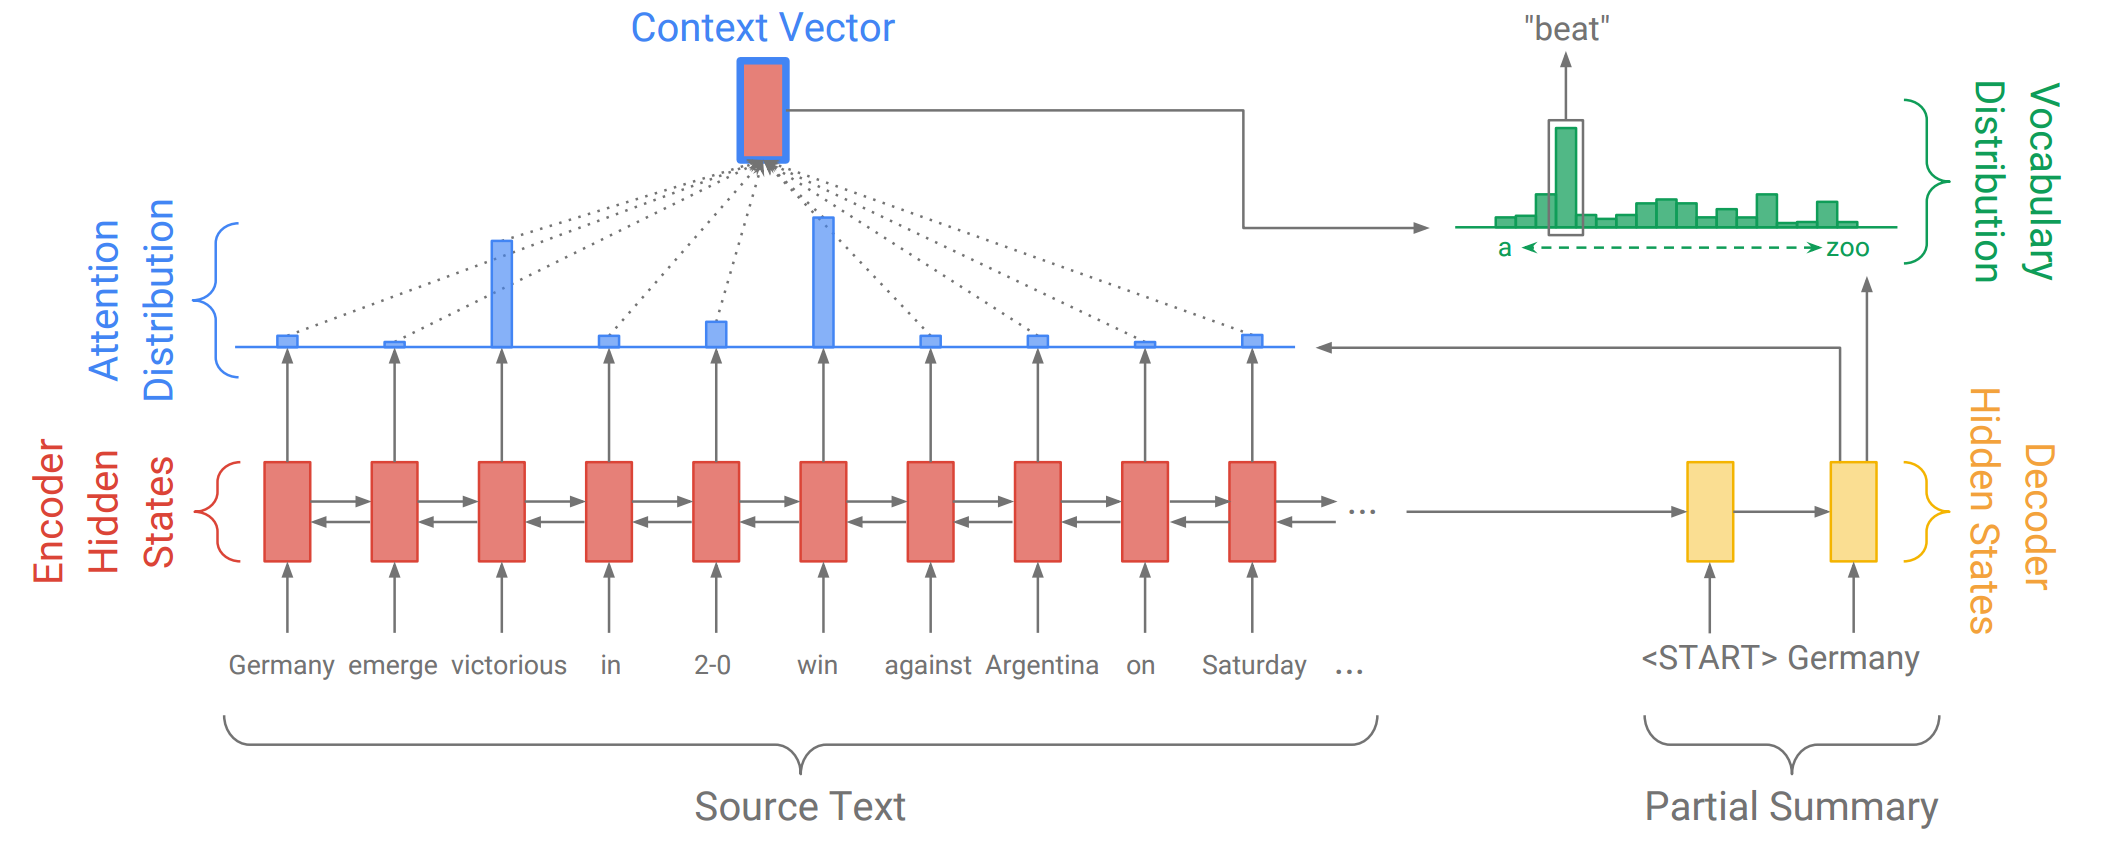

In [38]:
from IPython.display import Image
Image('http://abigailsee.com/img/seq2seq-attn.png', width=1000, height=400)

In [39]:
%%bash

!(python run_summarization.py \
--mode=decode \
--data_path=make_datafiles_for_pgn/output/finished_files/test.bin \
--vocab_path=/content/finished_files/vocab \
--log_root=/content/ \
--exp_name=pretrained_model \
--max_enc_steps=$max_words_input \
--max_dec_steps=$max_summary_tokens \
--min_dec_steps=$min_summary_tokens \
--beam_size=$beam_size \
--coverage=False \
--pointer_gen=False \
&& cp /content/pretrained_model/decode/attn_vis_data.json \
attn_vis/attn_vis_data_seq2seq.json)

max_size of vocab was specified as 50000; we now have 50000 words. Stopping reading.
Finished constructing vocabulary of 50000 total words. Last word added: chaudhary




W0325 10:21:44.874850 140654814734208 module_wrapper.py:139] From run_summarization.py:324: The name tf.app.run is deprecated. Please use tf.compat.v1.app.run instead.

W0325 10:21:44.875571 140654814734208 module_wrapper.py:139] From run_summarization.py:271: The name tf.logging.set_verbosity is deprecated. Please use tf.compat.v1.logging.set_verbosity instead.

W0325 10:21:44.875746 140654814734208 module_wrapper.py:139] From run_summarization.py:271: The name tf.logging.INFO is deprecated. Please use tf.compat.v1.logging.INFO instead.

W0325 10:21:44.875940 140654814734208 module_wrapper.py:139] From run_summarization.py:272: The name tf.logging.info is deprecated. Please use tf.compat.v1.logging.info instead.

I0325 10:21:44.876163 140654814734208 run_summarization.py:272] Starting seq2seq_attention in decode mode...
W0325 10:21:44.929171 140653137336064 module_wrapper.py:139] From /content/pointer-generator/batcher.py:372: The name tf.logging.warning is deprecated. Please use tf.c

### Adding the Pointer-Generator mechanism

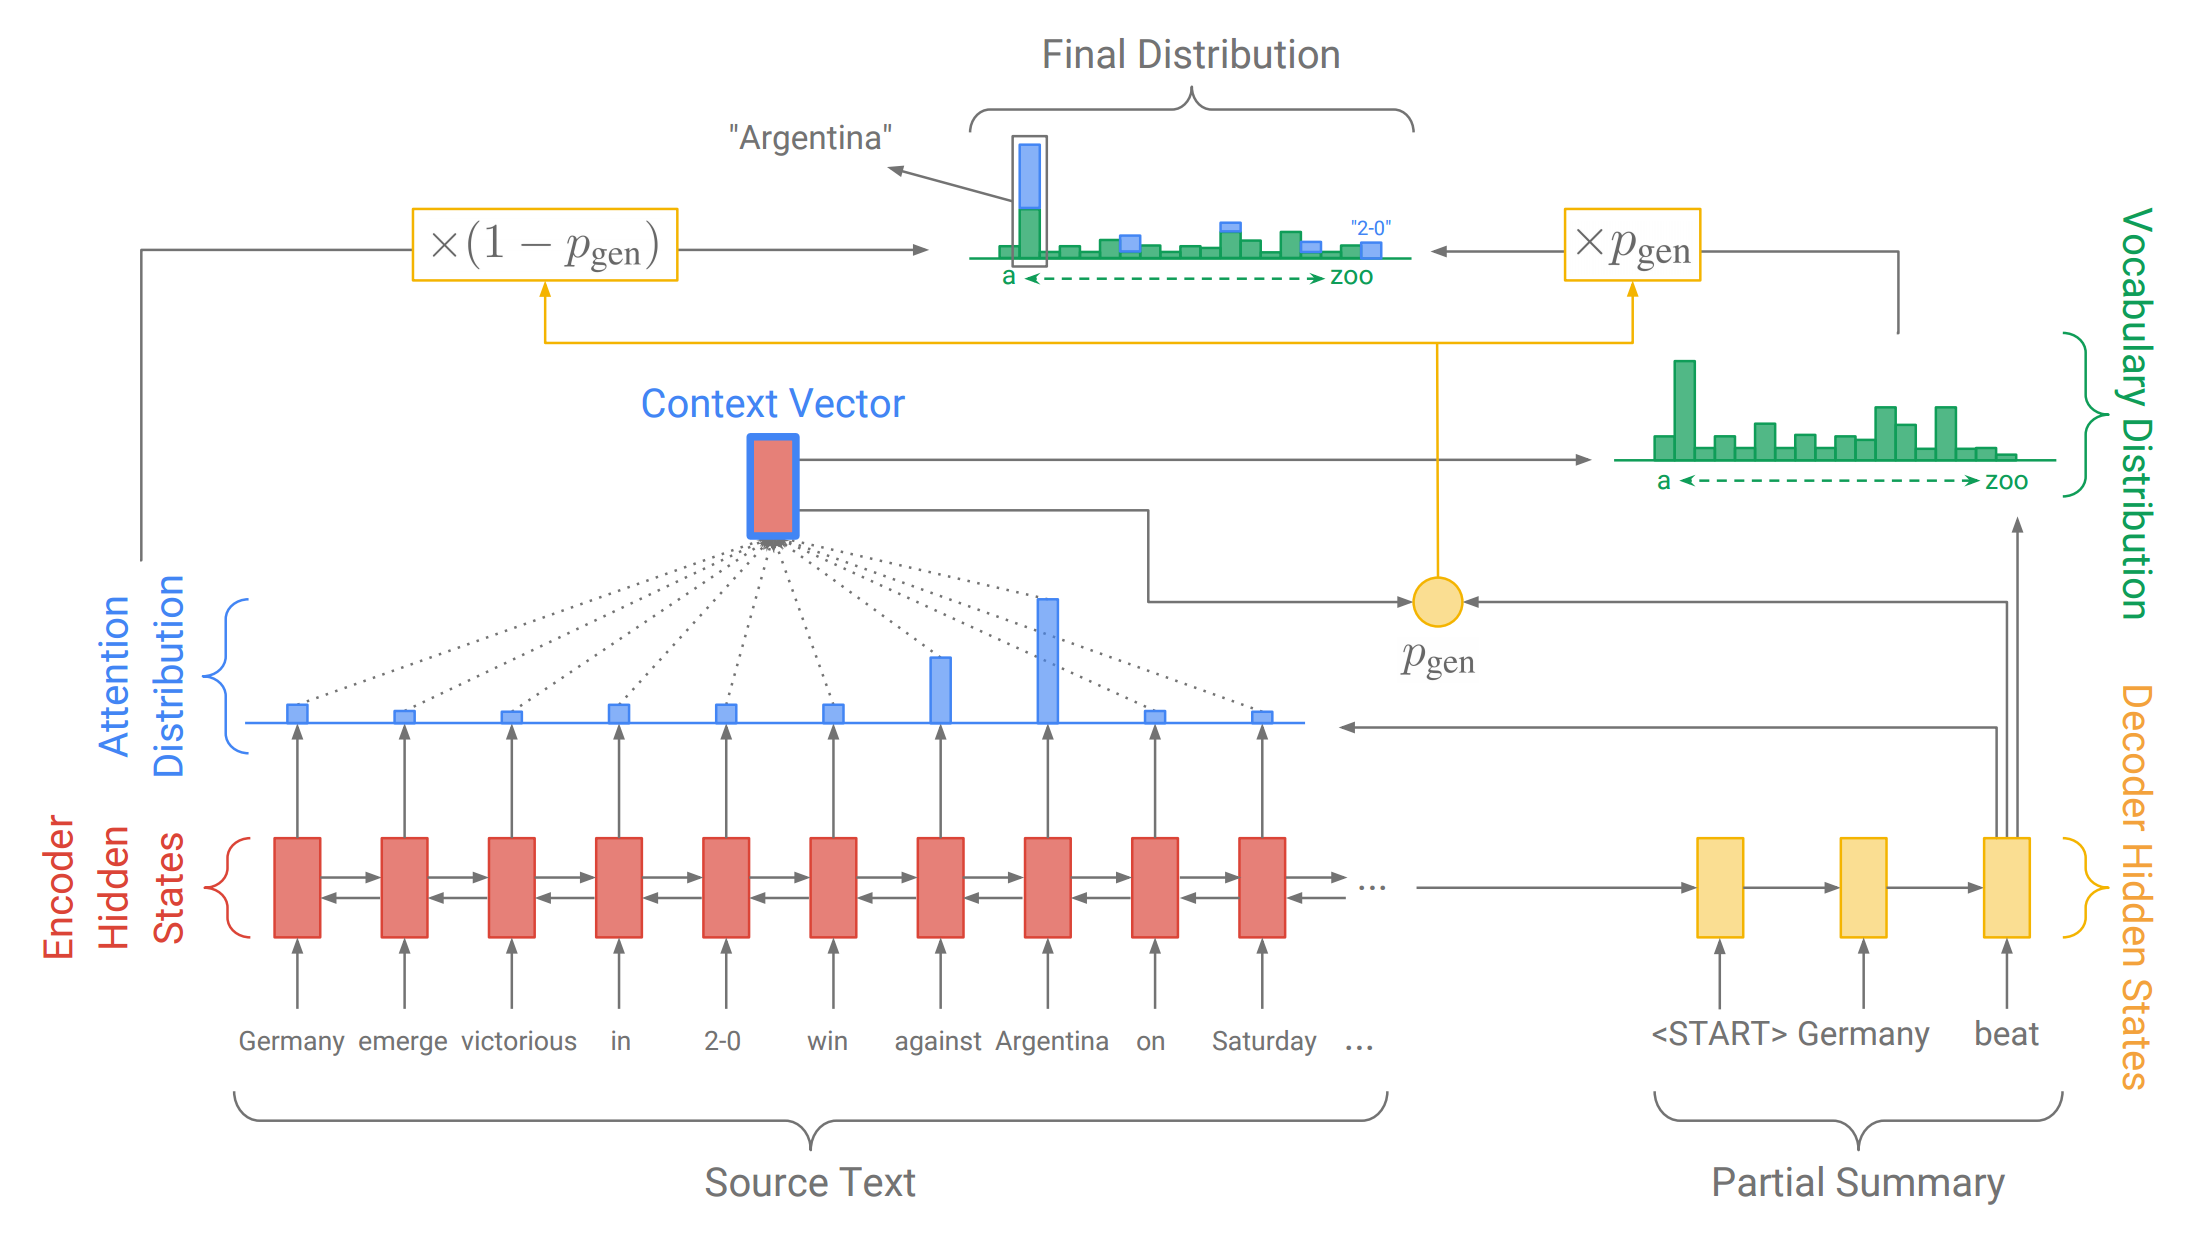

In [40]:
from IPython.display import Image
Image('http://abigailsee.com/img/pointer-gen.png', width=900, height=500)

In [41]:
%%bash

!(python run_summarization.py \
--mode=decode \
--data_path=make_datafiles_for_pgn/output/finished_files/test.bin \
--vocab_path=/content/finished_files/vocab \
--log_root=/content/ \
--exp_name=pretrained_model \
--max_enc_steps=$max_words_input \
--max_dec_steps=$max_summary_tokens \
--min_dec_steps=$min_summary_tokens \
--beam_size=$beam_size \
--coverage=False \
--pointer_gen=True \
&& cp /content/pretrained_model/decode/attn_vis_data.json \
attn_vis/attn_vis_data_pgen.json)

max_size of vocab was specified as 50000; we now have 50000 words. Stopping reading.
Finished constructing vocabulary of 50000 total words. Last word added: chaudhary




W0325 10:21:51.057528 139636190123904 module_wrapper.py:139] From run_summarization.py:324: The name tf.app.run is deprecated. Please use tf.compat.v1.app.run instead.

W0325 10:21:51.058264 139636190123904 module_wrapper.py:139] From run_summarization.py:271: The name tf.logging.set_verbosity is deprecated. Please use tf.compat.v1.logging.set_verbosity instead.

W0325 10:21:51.058459 139636190123904 module_wrapper.py:139] From run_summarization.py:271: The name tf.logging.INFO is deprecated. Please use tf.compat.v1.logging.INFO instead.

W0325 10:21:51.058649 139636190123904 module_wrapper.py:139] From run_summarization.py:272: The name tf.logging.info is deprecated. Please use tf.compat.v1.logging.info instead.

I0325 10:21:51.058762 139636190123904 run_summarization.py:272] Starting seq2seq_attention in decode mode...
W0325 10:21:51.112926 139634512725760 module_wrapper.py:139] From /content/pointer-generator/batcher.py:372: The name tf.logging.warning is deprecated. Please use tf.c

### Adding the coverage mechanism to prevent repetition

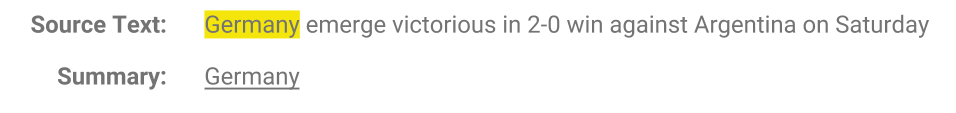

In [42]:
!wget http://abigailsee.com/img/coverage.gif -nc -q # skip if exists and don't be verbose
Image(open('coverage.gif','rb').read())

In [43]:
%%bash

!(python run_summarization.py \
--mode=decode \
--data_path=make_datafiles_for_pgn/output/finished_files/test.bin \
--vocab_path=/content/finished_files/vocab \
--log_root=/content/ \
--exp_name=pretrained_model \
--max_enc_steps=$max_words_input \
--max_dec_steps=$max_summary_tokens \
--min_dec_steps=$min_summary_tokens \
--beam_size=$beam_size \
--coverage=True \
--pointer_gen=True \
&& cp /content/pretrained_model/decode/attn_vis_data.json \
attn_vis/attn_vis_data_pgen_cov.json)

max_size of vocab was specified as 50000; we now have 50000 words. Stopping reading.
Finished constructing vocabulary of 50000 total words. Last word added: chaudhary




W0325 10:22:02.313121 140637706839936 module_wrapper.py:139] From run_summarization.py:324: The name tf.app.run is deprecated. Please use tf.compat.v1.app.run instead.

W0325 10:22:02.313765 140637706839936 module_wrapper.py:139] From run_summarization.py:271: The name tf.logging.set_verbosity is deprecated. Please use tf.compat.v1.logging.set_verbosity instead.

W0325 10:22:02.313957 140637706839936 module_wrapper.py:139] From run_summarization.py:271: The name tf.logging.INFO is deprecated. Please use tf.compat.v1.logging.INFO instead.

W0325 10:22:02.314160 140637706839936 module_wrapper.py:139] From run_summarization.py:272: The name tf.logging.info is deprecated. Please use tf.compat.v1.logging.info instead.

I0325 10:22:02.314275 140637706839936 run_summarization.py:272] Starting seq2seq_attention in decode mode...
W0325 10:22:02.369291 140636029441792 module_wrapper.py:139] From /content/pointer-generator/batcher.py:372: The name tf.logging.warning is deprecated. Please use tf.c

# Visualizing attention and $p_{gen}$ dynamically ⚡

## Merge all 3 files for Base Seq2Seq + Pointer-Generator + Pointer-Generator with Coverage

In [44]:
%cd attn_vis
!rm -f attn_vis_data.json

/content/pointer-generator/attn_vis


In [45]:
import json

json_files = [
    json.load(open(file, 'r')) 
    for file in ('attn_vis_data_seq2seq.json', 'attn_vis_data_pgen.json', 'attn_vis_data_pgen_cov.json')
]

In [46]:
final_attn = {
    "article_lst": json_files[0]["article_lst"],
    "networks_output": [
        {k: v for k, v in network_json.items() if k != "article_lst"}
        for network_json in json_files
    ]
}

In [47]:
with open("attn_vis_data.json", "w") as final_json:
    json.dump(final_attn, final_json)

## Starting visualizer server

In [48]:
# only execute this cell once to start a server on port 8000
# just re-run the above code from the parameters form to change the input text and refresh the demo page
get_ipython().system_raw('python -m SimpleHTTPServer 8000 &')

In [31]:
from google.colab.output import eval_js
print(eval_js("google.colab.kernel.proxyPort(8000)"))

https://fmoc5swz2tl-496ff2e9c6d22116-8000-colab.googleusercontent.com/


## Execute the above cell and copy the link to open the visualization page 🚀